In [2]:
with open('text.txt','r',encoding='utf-8') as file:
    full_text = file.read()

In [3]:
import yake
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(full_text)
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  deep learning : score 0.002520379531860322
Keyphrase:  machine learning : score 0.0038497203794980576
Keyphrase:  deep learning algorithm : score 0.0045147655759145274
Keyphrase:  learning : score 0.00485971468708135
Keyphrase:  footnote footnote : score 0.005116212226469327
Keyphrase:  footnote : score 0.008899028239000038
Keyphrase:  deep : score 0.01131933955203325
Keyphrase:  learning algorithm : score 0.011414499532069862
Keyphrase:  computer : score 0.012028345345579715
Keyphrase:  computers : score 0.013927557768565987


In [4]:
from multi_rake import Rake
rake = Rake()
keywords = rake.apply(full_text)
print(keywords[:10])

[('connecticut state champion', 9.0), ('answering incredibly subtle', 9.0), ("city's national museum", 9.0), ('automatic drug discovery', 9.0), ('expressing negative sentiment', 9.0), ('clinically relevant features', 9.0), ('predicting survival rates', 9.0), ('popular imagenet competition', 8.0), ('read street numbers', 8.0), ('black shirt playing', 8.0)]


In [5]:
from summa import keywords
TR_keywords = keywords.keywords(full_text, scores=True)
print(TR_keywords[0:10])

[('learn', 0.2642550935209313), ('learning', 0.2642550935209313), ('learned', 0.2642550935209313), ('human', 0.2072774986694311), ('humans', 0.2072774986694311), ('footnote', 0.20690797445662992), ('things', 0.1617246908233053), ('thing', 0.1617246908233053), ('actually', 0.15114057594379163), ('algorithm', 0.14964347018545268)]


In [6]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-mpnet-base-v2')
keywords = kw_model.extract_keywords(full_text, 

                                     keyphrase_ngram_range=(1, 3), 

                                     stop_words='english',

                                     highlight=False,

                                     top_n=10) 

keywords_list= list(dict(keywords).keys())
print(keywords_list)

['machine learning commercially', 'developed machine learning', 'machine learning companies', 'machine learning past', 'computers learn computers', 'computers learn things', 'machine learning practitioner', 'machine learning experts', 'machine learning revolution', 'computers learn']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 3) 
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([full_text])
candidates = count.get_feature_names()
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([full_text])
candidate_embeddings = model.encode(candidates)
from sklearn.metrics.pairwise import cosine_similarity

top_n = 10
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
keywords

['new medical diagnostic',
 'programming haven requires',
 'computer new program',
 'computers just learned',
 'computers chart need',
 'jobs going hard',
 'wanted computer new',
 'scientists long build',
 'terrified doing theory',
 'build better computers']

In [8]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
output = set(get_hotwords(full_text))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

discussion
medicine
mixed
construction
useful
companies
course
discovery
traffic
thinking


In [9]:
import spacy
import pytextrank
# example text
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(full_text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase.text)

deep learning algorithms
Deep learning
deep learning
machine learning
machine learning experts
better computers
Computers
computers
similar images
new things


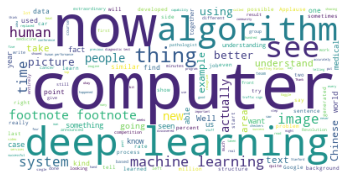

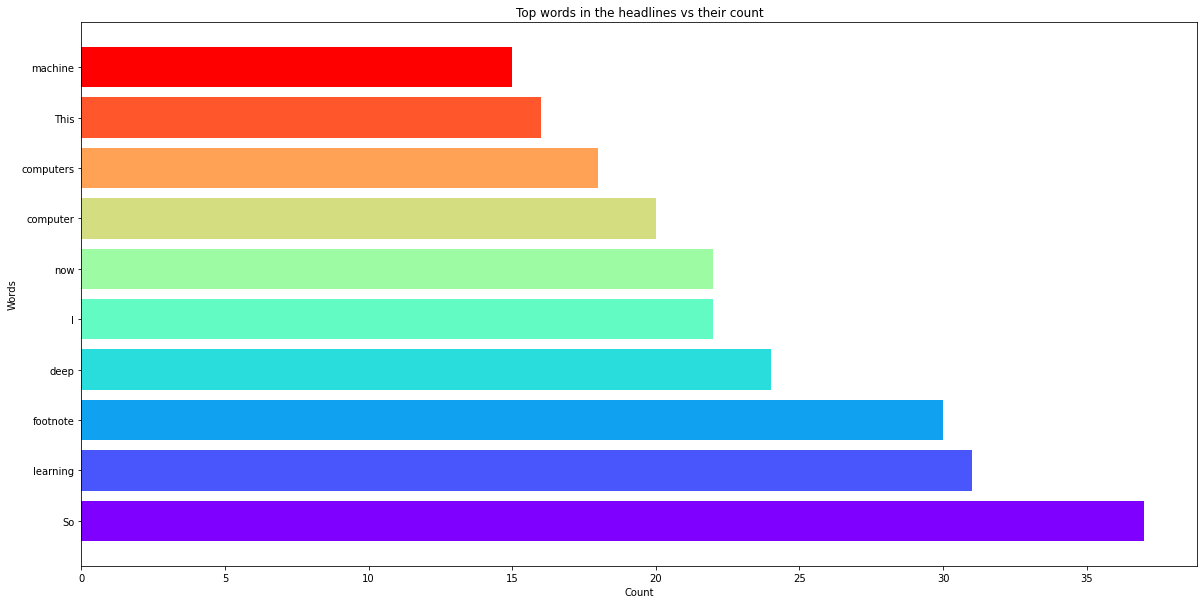

In [10]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(full_text)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in full_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()